# Natural Language Processing

## Theory

### Classical vs Deep Learning Models

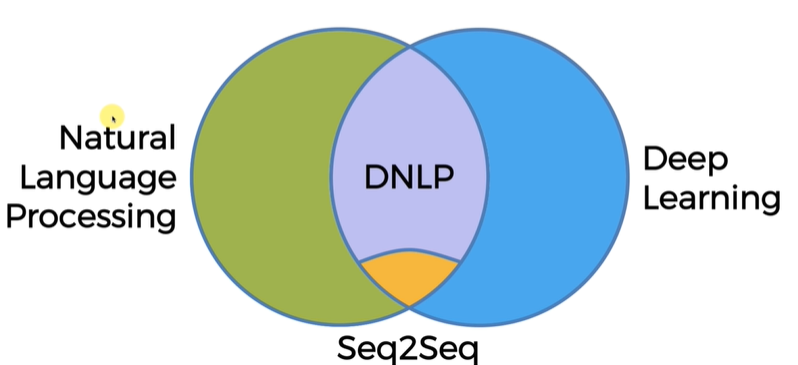

**Example:**

1. If/ Else Rules (Chatbot)
2. Audio frequency components analysis (Speech Recognition)
3. Bag-of-words model (Classification): Classifiy words as 0 or 1 based on bag of words with their matching.
4. Convolutional Neural Networks(CNN) for text Recognition (Classification)
5. Seq2Seq (many applications)

### Example of Email responses

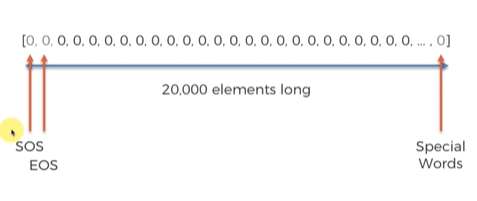

Last word is reserved for those words, which are not present in the 20,000 category of list of words

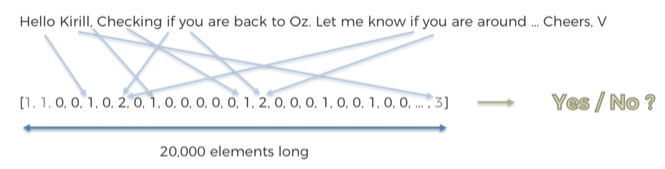

2 ways: 

1. Using NLP and applyting logistic regression and classifying into yes or no categories.
2. Using DNLP and applying neural networks.

Both have the limitation of not providing sophisticated answers.

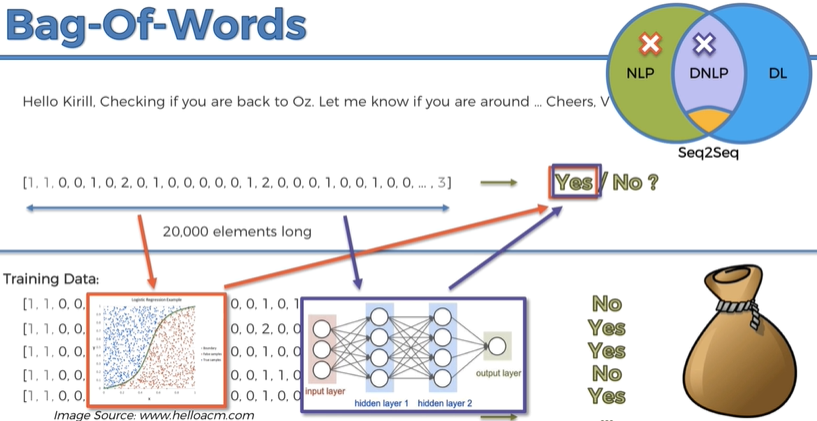

### Predicting text reviews of a restaurent using Sentiment analysis

## Implementation

### Reference

In [ ]:
https://www.kaggle.com/faressayah/natural-language-processing-nlp-for-beginners#%F0%9F%93%9A-NLP-(Natural-Language-Processing)-with-Python

### Importing the libraries

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [263]:
dataset = pd.read_csv("spam.csv", encoding='latin-1')
# Importing tsv file using same function by changing delimiter
# quoting = 3: To ignore "" present in the file 
print(len(dataset.iloc[:, 1].values))
# dataset = dataset.iloc[:, 1].values
print((dataset))
# dataset.columns = ["Label", "Message"]
# dataset.describe()
dataset.groupby("v1").describe()

5572
        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

### Cleaning the texts

In [264]:
import re
import nltk
# Stop-words: Not relevant for predictions e.g. a, the, an, etc; must be removed
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Steming: Simplifying the texts, converting to their root e.g. I loved it => I love it
corpus = [] # Will contain the clean texts

for i in range(len(dataset)):
  review = re.sub('[^a-zA-Z0-9]', ' ', dataset['v2'][i]) 
  # Removing punctuations and special characters, by replacing them by spaces
  # ^a-zA-Z : Means not (a-z and A-Z)
  review = review.lower()
  review = review.split() # Split into list of words
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
print((corpus))

sample = re.sub('[^a-zA-Z0-9]', ' ', "5500 Bonus is waiting for you! Register on Junglee Rummy today & get a Welcome Bonus on your first deposit download the app now: ")
sample = sample.lower()
sample = sample.split()
ps = PorterStemmer()
stopwords = stopwords.words('english')
sample = [ps.stem(word) for word in sample if not word in set(stopwords)]
sample = ' '.join(sample)
sample = [sample]
print(type(sample), type(corpus))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv', 'even brother not like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun', 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour', 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash 100

In [248]:
dataset['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### Creating the Bag of Words model

In [265]:
# Tokenization: Create Parse matrix, 
# With rows as the reviews and 
# Columns as the words of the reviews and 
# Cell value as 0 or 1 based on the word presnt in that review
from sklearn.feature_extraction.text import CountVectorizer
# Take most frequent words only as columns
cv = CountVectorizer(max_features = 1500)

x = cv.fit_transform(corpus).toarray() # fit takes all the words, and transform puts them into the columns
# x is a matrix of features, where each is is 0/1 depending on the word presnt in the review or not

y = dataset.iloc[:, 0].values

# y = dataset.v1.map({'ham':0, 'spam':1})
# y is dependent variable, having value of 0/1 depending on whether the review is +'ve or -'ve
print(x[0])
print(y)

[0 0 0 ... 0 0 0]
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


### Splitting the dataset into the Training set and Test set

In [266]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [260]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
# 0.979372197309417

LogisticRegression()

### Training the Naive Bayes model on the Training set

In [268]:
 from sklearn.naive_bayes import MultinomialNB
 classifier = MultinomialNB()
 classifier.fit(x_train, y_train)
#  0.9838565022421525

MultinomialNB()

### Training the Decision Tree model on the Training set

In [129]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# 0.968609865470852

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Training the Random Forest model on the Training set

In [143]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state = 0)
# criterion = 'gini' gives more accuracy
classifier.fit(x_train, y_train)
# 0.9802690582959641

RandomForestClassifier(criterion='entropy', random_state=0)

### Training the Kernel SVC model on the Training set

In [157]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
# 0.9775784753363229

SVC(random_state=0)

### Training the K-Nearest Neighboor model on the Training set

In [171]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
# 0.9112107623318386

KNeighborsClassifier()

### Predicting Sample value

In [269]:
# sample defined here: https://colab.research.google.com/drive/1_n-rCOIBvEKEsc49qHLrQeoVcuhxdWAW#scrollTo=qroF7XcSCvY3&line=6&uniqifier=1
sample = cv.transform(sample).toarray()
print(sample)
classifier.predict(sample)

[[0 0 0 ... 0 0 0]]


array(['spam'], dtype='<U4')

### Predicting the Test set results

In [270]:
y_pred = classifier.predict(x_test)
y_concat = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
# y_concat = np.concatenate((y_pred, y_test), 0)
print((y_concat))
# y_con = np.concatenate((y_train.reshape(len(y_train), 1), y_test.reshape(len(y_test), 1)), 0)
# print(len(y_con))

[['ham' 'ham']
 ['ham' 'ham']
 ['ham' 'ham']
 ...
 ['ham' 'ham']
 ['ham' 'ham']
 ['ham' 'ham']]


### Making the Confusion Matrix

In [271]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[942   7]
 [ 11 155]]


0.9838565022421525

### Extras

In [277]:
dataset['message_len'] = dataset.v2.apply(len)
# dataset.head()
dataset.message_len.describe()
dataset[dataset.message_len==910].v2.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Text(0.5, 0, 'Message Length')

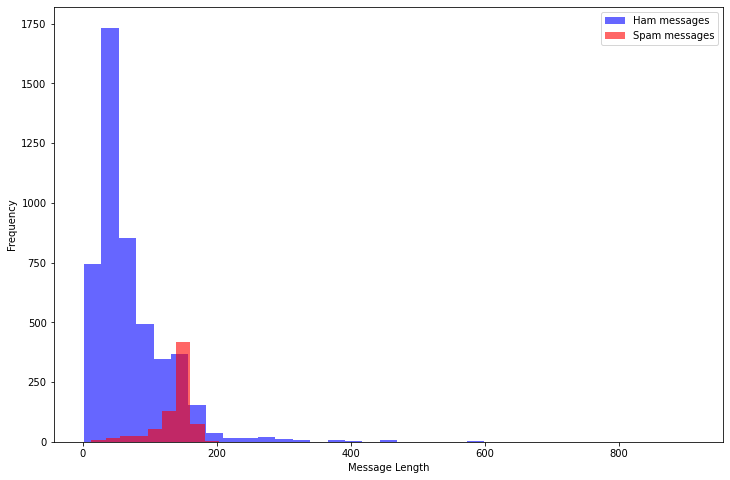

In [278]:
plt.figure(figsize=(12, 8))

dataset[dataset.v1=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
dataset[dataset.v1=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")